# Chatbot programmieren

| Sätze | Labels | Antwort |
|-------|--------|---------|
| Hallo | Begrüßung | Hallo! Wie kann ich Ihnen helfen? |
| Tschüss | Verabschiedung | Auf Wiedersehen! |
| Danke | Dank | Gern geschehen! |

Chatbot erkennt label eines vom User eingegebenen Satzes und sucht dann eien zufällige Antwort aus dem jeweiligen Label.

Mit Machinen Learning (Klassifizuerungsalgorithmus) soll ein unbekannter Satz nach dem Training in eine der verfügbaren Kategorien (Labels) eingeteilt werden.


1. Machine Learning
- Installiere pandas und scikit-learn        
- Jeder Satz im Datensatz wird in ein Bag of Words verwandelt
- Der ML Algorithmus wird mit den Daten im BoW Format und den dazugehörigen Labels trainiert.
- Teste den Algorithmus indem du über die input-Funktion im Terminal einen Satz eingibst, dieser in ein Bow verwandelt und dann kategorisiert mit dem ML Algorithmus.

2. Chatbot
- Ein Satz aus dem Terminal User Input wird kategorisiert.
- Aus der responses Spalte wird eine zufällige Antwort mit der passenden Kategorie ausgewählt und ausgegeben.

Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# %pip install google

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
from tensorflow import keras

Functions:

In [3]:
def bow(vocabulary:list, sentence:str, )-> list:
    '''Generates a bow-array:list[int] for a given sentence:str based on a given vocabulary:list[str] '''
    bagOfWords = []
    for word in vocabulary:
        if word in sentence.lower():
            bagOfWords.append(1)
        else:
            bagOfWords.append(0)
    return bagOfWords

def bow_list(vocabulary:list, sentences:list[str])->list[int]:
    ''' Generates a list of bow-arrays for list of sentences based on a given vocabulary:list[str] '''
    bow_list:list[int] = []
    for sentence in sentences:
        bow_list.append(bow(vocabulary, sentence))
    return bow_list

def remove_chars(chars, sentences):
    ''' Removes chars from sentences:list[str] and return "cleaned" sentences '''
    clean_sentences = []
    for sentence in sentences:
        for char in chars:
            if char in sentence:
                sentence = sentence.replace(char, '')
        sentence = sentence.strip().lower()
        clean_sentences.append(sentence)
    return clean_sentences

def create_vocabulary(sentences):
    ''' Creates array of words (vocabulary) based on given sentences '''
    words_list = []
    for sentence in sentences:
        words = sentence.split(" ")
        for word in words:
            words_list.append(word)
    vocabulary = list(set(words_list))
    # vocabulary = words_list
    return vocabulary

Read CSV-Training data

In [4]:
df = pd.read_csv('ChatbotTraining.csv',
                sep=',',              # Specify separator (default is comma)
                encoding='utf-8',     # Specify encoding
                header=0)
print(df['tag'].shape)
print(df['patterns'].shape)

(210,)
(210,)


Input data: Preparation and cleaning

(210, 331) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


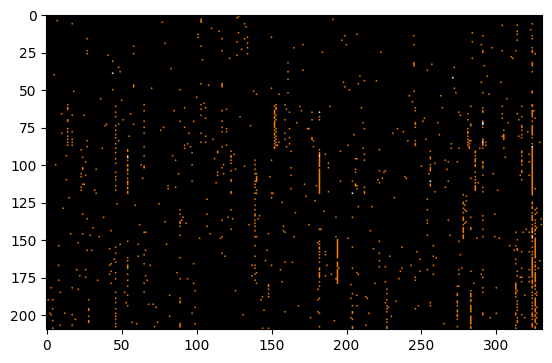

In [5]:
# input data
sentences = df['patterns'].values.tolist()
# remove chars from sentences
chars = '!?.\','
sentences = remove_chars(chars, sentences)


count_vec = CountVectorizer()
word_counts = count_vec.fit_transform(sentences,)
print(word_counts.shape, word_counts.toarray())
plt.imshow(word_counts.toarray(), 'afmhot')

Data model: Using Bag of Words as Vocabulary

(210, 334)


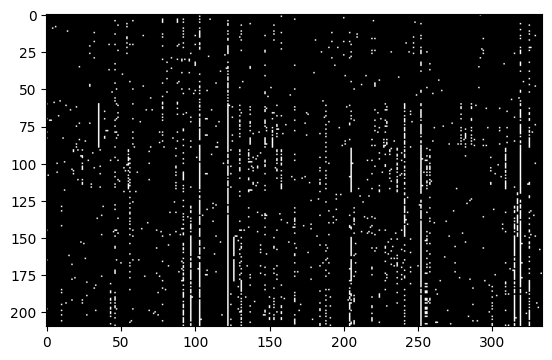

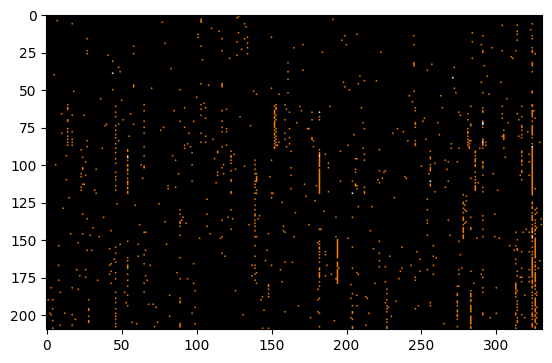

In [6]:
vocabulary = create_vocabulary(sentences)
X_train = bow_list(vocabulary, sentences)

X_matrix = np.array(X_train)
print(X_matrix.shape)
plt.imshow(X_matrix, 'afmhot')
plt.show()
plt.imshow(word_counts.toarray(), 'afmhot')

Labels / output data:

In [7]:
# labels / output data
labels = df['tag'].values.tolist()
le = LabelEncoder()
y = le.fit_transform(labels)
print(f"Labels: {y}")

Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


Model training:

In [17]:
# Ensure X_train is a NumPy array
X_train = np.array(X_train)

tf_chatbot = tf.keras.Sequential()
tf_chatbot.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) # input layer
tf_chatbot.add(tf.keras.layers.Dense(128, activation='relu')) # hidden layer
tf_chatbot.add(tf.keras.layers.Dense(len(set(y)), activation='softmax')) # output layer

C:\Users\weber\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile TF-Model

In [20]:
tf_chatbot.compile(optimizer='adam',                        # standard for binary classification
                   loss='sparse_categorical_crossentropy',  # adaptive learning rate optimizer
                   metrics=['accuracy'])                    
tf_chatbot.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │        42,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,295 (235.53 KB)

 Trainable params: 60,295 (235.53 KB)

 Non-trainable params: 0 (0.00 B)

Train TF-Chatbot-Model

In [21]:
tf_chatbot.fit(X_train, y, batch_size=8, epochs=10) # fit model to data)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.2483 - loss: 1.8998
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6549 - loss: 1.5211
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8279 - loss: 0.9269
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9404 - loss: 0.5397
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9818 - loss: 0.2747
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9783 - loss: 0.1688
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000 - loss: 0.0931
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0458
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 1.0000 - loss: 0.0381
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 1.0000 - loss: 0.0224


Genauigkeit der Traningsdaten: Wie gut bildet das Modell die Trainingsdaten ab?

In [22]:
_, accuracy = tf_chatbot.evaluate(X_train, y)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Save the model
tf_chatbot.save('chatbot_model.h5')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0289


Accuracy: 100.00%


Model Predctions

In [ ]:
y_predict = tf_chatbot.predict(X_test)
tag_predict = le.inverse_transform(y_predict)
print(f"Predicted tags: {tag_predict}")

Anwendung:

In [ ]:
# while True:
#     userInput = input("Please enter a sentence [q: Exit]: ").lower()
#     if userInput == "q":
#         break
#     userInput = [bow(vocabulary, userInput)]
#     print(userInput)
#     y_predict = decisionTree.predict(X_test)
#     tag_predict = le.inverse_transform(y_predict)
#     print(tag_predict)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,